# Exercise 1: Parameter-Driven Regularization

In this exercise, you'll create three models with different regularization strategies and compare their performance.

c:\Users\washi\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.6363 - loss: 1.1176 - val_accuracy: 0.8020 - val_loss: 0.5611
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - accuracy: 0.8193 - loss: 0.5264 - val_accuracy: 0.8302 - val_loss: 0.4864
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - accuracy: 0.8410 - loss: 0.4607 - val_accuracy: 0.8426 - val_loss: 0.4396
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.8491 - loss: 0.4318 - val_accuracy: 0.8516 - val_loss: 0.4204
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - accuracy: 0.8564 - loss: 0.4142 - val_accuracy: 0.8466 - val_loss: 0.4343
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.8586 - loss: 0.4044 - val_accuracy: 0.8512 - val_loss: 0.4099
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.8659 - loss: 0.3866 - val_accuracy: 0.8534 - val_loss: 0.4055
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.8665 -

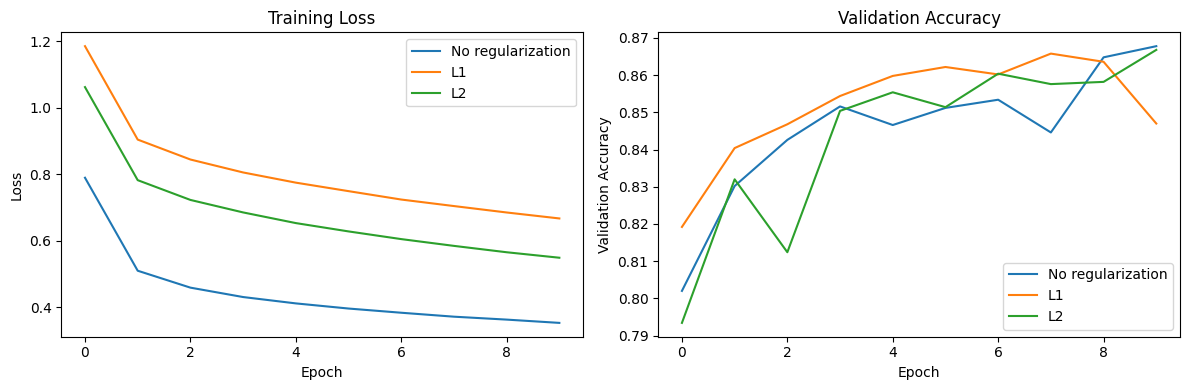

In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Create a validation set
X_train = X_train_full[:-5000] / 255.0
X_valid = X_train_full[-5000:] / 255.0
X_test = X_test / 255.0

y_train = y_train_full[:-5000]
y_valid = y_train_full[-5000:]

# Exercise 1: Impact of L1 vs L2 Regularization
# -------------------------------------------


def create_model(reg_type=None, reg_rate=0.001):  # Note the smaller default reg_rate
    """
    Create a model with specified regularization.
    
    Parameters:
    reg_type: str, one of ['l1', 'l2', 'l1_l2', None]
    reg_rate: float, regularization rate
    
    Returns:
    Compiled Keras model
    """
    if reg_type == 'l1':
        regularizer = tf.keras.regularizers.l1(reg_rate)
    elif reg_type == 'l2':
        regularizer = tf.keras.regularizers.l2(reg_rate)
    elif reg_type == 'l1_l2':
        regularizer = tf.keras.regularizers.l1_l2(reg_rate, reg_rate)
    else:
        regularizer = None
    
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                            kernel_regularizer=regularizer),
        tf.keras.layers.Dense(100, activation="relu", 
                            kernel_regularizer=regularizer),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    
    # TODO: Complete model compilation with appropriate optimizer and learning rate
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    
    model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=optimizer,
                 metrics=["accuracy"])
    return model

def train_and_compare_models():
    """Train models with different regularization and plot results."""
    
    # TODO: Create three models with different regularization
    model_no_reg = create_model(reg_type=None)
    model_l1 = create_model(reg_type='l1', reg_rate=0.0001)
    model_l2 = create_model(reg_type='l2', reg_rate=0.001)
    
    # Train models
    history_no_reg = model_no_reg.fit(X_train, y_train, epochs=10, 
                                     validation_data=(X_valid, y_valid),
                                     verbose=1)
    history_l1 = model_l1.fit(X_train, y_train, epochs=10,
                             validation_data=(X_valid, y_valid),
                             verbose=1)
    history_l2 = model_l2.fit(X_train, y_train, epochs=10,
                             validation_data=(X_valid, y_valid),
                             verbose=1)
    
    # Plot results
    plt.figure(figsize=(12, 4))
    
    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(history_no_reg.history['loss'], label='No regularization')
    plt.plot(history_l1.history['loss'], label='L1')
    plt.plot(history_l2.history['loss'], label='L2')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss')
    
    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history_no_reg.history['val_accuracy'], label='No regularization')
    plt.plot(history_l1.history['val_accuracy'], label='L1')
    plt.plot(history_l2.history['val_accuracy'], label='L2')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    
    plt.tight_layout()
    plt.show()
    
    return model_no_reg, model_l1, model_l2

models = train_and_compare_models()
    

# Exercise 2: Dropout Regularization

In this exercise, you'll explore how dropout affects model training and inference in neural networks. You'll implement different dropout strategies and visualize their effects on model performance.

## Part 1: Data Preparation

First, let's load and prepare our Fashion MNIST data:



In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Create a validation set
X_train = X_train_full[:-5000] / 255.0
X_valid = X_train_full[-5000:] / 255.0
X_test = X_test / 255.0

y_train = y_train_full[:-5000]
y_valid = y_train_full[-5000:]



## Part 2: Building Models with Different Dropout Configurations

We'll create a function that builds models with different dropout patterns. Fill in the missing pieces:



In [16]:
def create_model(dropout_pattern):
    """
    Create a model with specified dropout pattern.
    
    Parameters:
    dropout_pattern: list of float, dropout rates for each layer (use None for no dropout)
    
    Returns:
    Compiled Keras model
    """
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
    
    # TODO: Add three Dense layers (100 neurons each) with ReLU activation
    # Add dropout after each Dense layer according to dropout_pattern
    # Your code here:
    for rate in dropout_pattern:

        model.add(tf.keras.layers.Dense(100, activation="relu"))    
        if rate is not None:
            model.add(tf.keras.layers.Dropout(rate))
            pass
    
    # Add output layer
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    # TODO: Compile the model with appropriate optimizer and metrics
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=tf.keras.optimizers.SGD(learning_rate = 0.01),
                  metrics=["accuracy"])
    
    return model



## Part 3: Training and Evaluation

Let's create a function to train and compare different dropout configurations:



Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.6192 - loss: 1.1320 - val_accuracy: 0.8004 - val_loss: 0.5676
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - accuracy: 0.8181 - loss: 0.5137 - val_accuracy: 0.8112 - val_loss: 0.5035
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - accuracy: 0.8371 - loss: 0.4582 - val_accuracy: 0.8132 - val_loss: 0.5049
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.8472 - loss: 0.4254 - val_accuracy: 0.8498 - val_loss: 0.4178
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.8582 - loss: 0.3980 - val_accuracy: 0.8500 - val_loss: 0.4163
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.8628 - loss: 0.3804 - val_accuracy: 0.8638 - val_loss: 0.3706
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.8699 - loss: 0.3607 - val_accuracy: 0.8698 - val_loss: 0.3555
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.8726 -

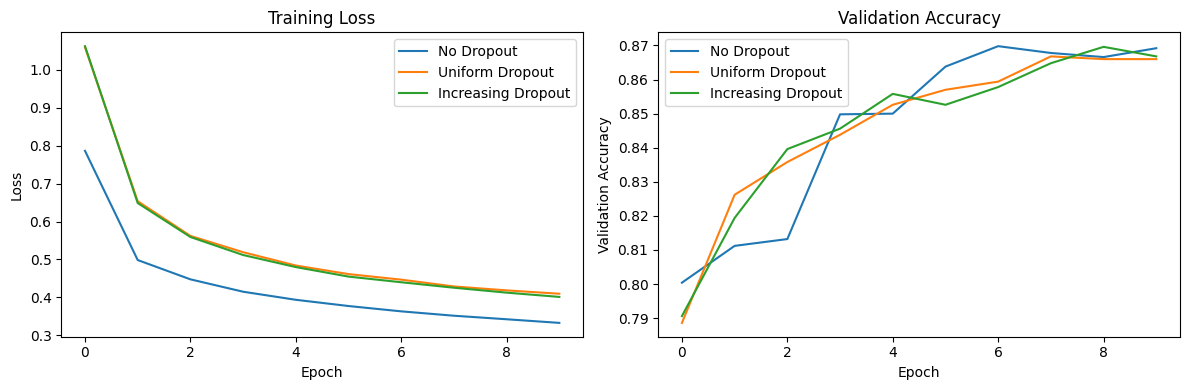

In [17]:
def compare_dropout_patterns():
    """Train and compare models with different dropout patterns."""
    
    # Define different dropout patterns to test
    patterns = {
        'No Dropout': [None, None, None],
        'Uniform Dropout': [0.2, 0.2, 0.2],
        'Increasing Dropout': [0.1, 0.2, 0.3]
    }
    
    histories = {}
    
    # TODO: Train a model for each dropout pattern
    # Your code here:
    for name, pattern in patterns.items():
        model = create_model(dropout_pattern=pattern)
        history = model.fit(X_train, y_train, epochs=10, 
                            validation_data=(X_valid, y_valid),
                            verbose=1)
        histories[name] = history
    
    return histories

def plot_training_curves(histories):
    """Plot training and validation metrics for different models."""
    plt.figure(figsize=(12, 4))
    
    # Plot training loss
    plt.subplot(1, 2, 1)
    for name, history in histories.items():
        # TODO: Plot training loss for each model
        plt.plot(history.history['loss'], label=name)
        pass
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss')
    
    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    for name, history in histories.items():
        # TODO: Plot validation accuracy for each model
        plt.plot(history.history['val_accuracy'], label=name)
        pass
    
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    
    plt.tight_layout()
    plt.show()


histories = compare_dropout_patterns()
plot_training_curves(histories)



## Questions to Consider:

1. How does the validation accuracy compare between different dropout patterns?
2. What effect does dropout have on training time?
3. How does Monte Carlo Dropout affect the model's predictions compared to standard inference?

# Exercise 3: Max-Norm Regularization

In this exercise, you'll explore how max-norm regularization affects neural network training and compare it with other regularization techniques. You'll visualize the weight distributions and see how different max-norm constraints impact model performance.

## Part 1: Data Preparation



In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Create a validation set
X_train = X_train_full[:-5000] / 255.0
X_valid = X_train_full[-5000:] / 255.0
X_test = X_test / 255.0

y_train = y_train_full[:-5000]
y_valid = y_train_full[-5000:]



## Part 2: Model Creation with Max-Norm Constraints



In [32]:
def create_model(max_norm=None):
    """
    Create a model with specified max-norm constraint.
    
    Parameters:
    max_norm: float or None, maximum norm constraint for the weights
    
    Returns:
    Compiled Keras model
    """
    # TODO: Create kernel_constraint 
    constraint = tf.keras.constraints.max_norm(max_norm) if max_norm is not None else None
    
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        # Add three Dense layers (100 neurons each) with ReLU activation and max-norm constraint
        tf.keras.layers.Dense(100, activation="relu", kernel_constraint=constraint),
        tf.keras.layers.Dense(100, activation="relu", kernel_constraint=constraint),
        tf.keras.layers.Dense(100, activation="relu", kernel_constraint=constraint),
        # Add output layer
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    
    
    # TODO: Compile model with SGD optimizer (lr=0.01) and appropriate metrics
    # Your code here
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                  metrics=["accuracy"])
    
    return model



## Part 3: Training and Visualization



In [33]:
def train_and_compare_norms():
    """Train models with different max-norm constraints and compare results."""
    
    # Create models with different max-norm constraints
    models = {
        'No Constraint': create_model(max_norm=None),
        'MaxNorm(1)': create_model(max_norm=1.0),
        'MaxNorm(.5)': create_model(max_norm=.5)
    }
    
    histories = {}
    
    # Train each model
    for name, model in models.items():
        print(f"\nTraining {name}")
        # TODO: Train model for 10 epochs and store history
        # Your code here
        histories[name] = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), verbose=0)
    
    return models, histories

def plot_weight_distributions(models, layer_index=1):
    """Plot weight distributions for a specific layer across models."""
    
    plt.figure(figsize=(15, 5))
    
    for idx, (name, model) in enumerate(models.items()):
        # TODO: Extract weights from the specified layer
        weights = model.layers[layer_index].weights[0].numpy()
        
        # Create subplot
        plt.subplot(1, 3, idx + 1)
        
        # TODO: Plot histogram of weights
        # Your code here: use plt.hist with appropriate bins and range
        plt.histogram(weights.flatten(), bins=50, range=[-.5, .5])
        plt.title(f'{name}\nStd: {weights.std():.4f}')
        plt.xlabel('Weight Value')
        plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

def plot_training_curves(histories):
    """Plot training and validation metrics."""
    plt.figure(figsize=(12, 4))
    
    # Plot training loss
    plt.subplot(1, 2, 1)
    for name, history in histories.items():
        # TODO: Plot training loss for each model
        plt.plot(history.history['loss'], label =name)
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss')
    
    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    for name, history in histories.items():
        # TODO: Plot validation accuracy for each model
        plt.plot(history.history['val_accuracy'],  label =name)
    
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    
    plt.tight_layout()
    plt.show()



## Part 4: Weight Norm Evolution



c:\Users\washi\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training No Constraint

Training MaxNorm(1)

Training MaxNorm(.5)


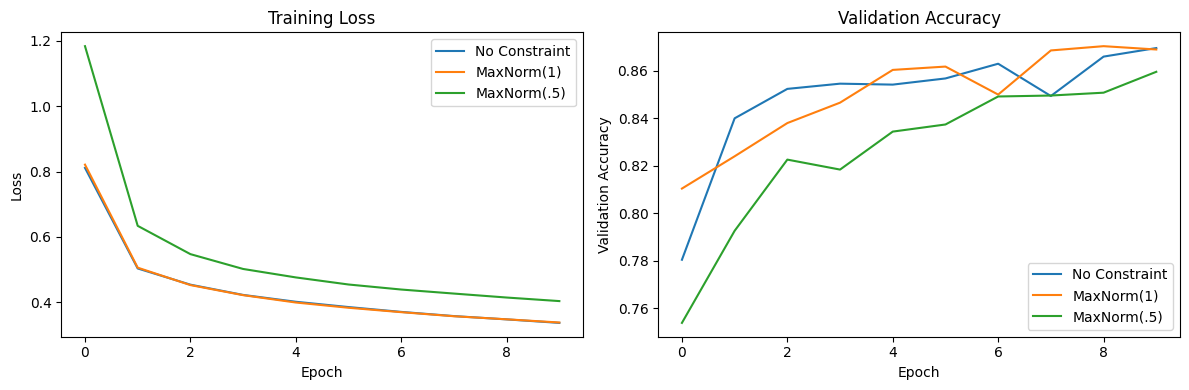

AttributeError: module 'matplotlib.pyplot' has no attribute 'histogram'

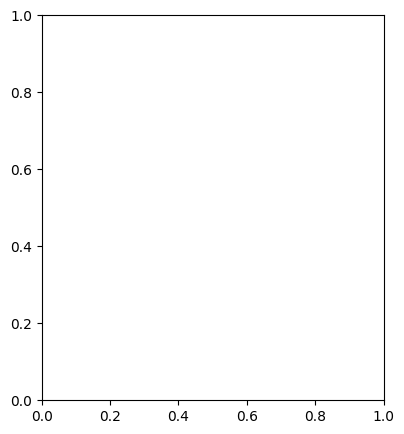

In [36]:
class WeightNormCallback(tf.keras.callbacks.Callback):
    """Callback to track weight norm evolution during training."""
    def __init__(self):
        super().__init__()
        self.weight_norms = []
    
    def on_epoch_end(self, epoch, logs=None):
        # TODO: Calculate and store the norm of weights from the first dense layer
        weights = self.model.layers[1].weights[0].numpy()
        self.weight_norms.append(np.linalg.norm(weights))


def plot_norm_evolution(model, X_train, y_train, X_valid, y_valid):
    """Train a model and plot how its weight norms evolve."""
    
    # Create callback
    norm_callback = WeightNormCallback()
    
    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=10,
        validation_data=(X_valid, y_valid),
        callbacks=[norm_callback],
        verbose=0
    )
    
    # Plot norm evolution
    plt.figure(figsize=(8, 4))
    plt.plot(norm_callback.weight_norms)
    plt.xlabel('Epoch')
    plt.ylabel('Weight Norm')
    plt.title('Evolution of Weight Norms During Training')
    plt.show()

# Run the experiments

models, histories = train_and_compare_norms()
plot_training_curves(histories)
plot_weight_distributions(models)

# Demonstrate norm evolution for a model with max_norm=1.0
constrained_model = create_model(max_norm=1.0)
plot_norm_evolution(constrained_model, X_train, y_train, X_valid, y_valid)



## Questions to Consider:

1. How does the max-norm constraint affect the distribution of weights?
2. What impact does the constraint value have on model performance?
3. How does training stability compare between constrained and unconstrained models?
4. In what scenarios might max-norm regularization be preferable to L1 or L2 regularization?

# Exercise 4: Monte Carlo Dropout

In this exercise, you'll explore how Monte Carlo Dropout can be used for uncertainty estimation in neural networks. You'll implement MC Dropout, visualize uncertainty estimates, and compare predictions with and without uncertainty estimation.

## Part 1: Setup and Data Preparation



In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Create a validation set
X_train = X_train_full[:-5000] / 255.0
X_valid = X_train_full[-5000:] / 255.0
X_test = X_test / 255.0

y_train = y_train_full[:-5000]
y_valid = y_train_full[-5000:]

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



## Part 2: Creating an MC Dropout Model



In [39]:
class MCDropout(tf.keras.layers.Dropout):
    """Dropout layer that applies dropout at inference time."""
    def call(self, inputs):
        # TODO: Modify the call method to always apply dropout
        return super().call(inputs, training=True)
        pass

def create_mc_model(dropout_rate=0.3):
    """Create a model with MC Dropout layers."""
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu"),
        # TODO: Add MCDropout layer with dropout_rate
        MCDropout(dropout_rate),

        tf.keras.layers.Dense(100, activation="relu"),
        # TODO: Add MCDropout layer with dropout_rate
        MCDropout(dropout_rate),

        tf.keras.layers.Dense(100, activation="relu"),
        # TODO: Add MCDropout layer with dropout_rate
        MCDropout(dropout_rate),

        tf.keras.layers.Dense(10, activation="softmax")
    ])
    
    # TODO: Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model



## Part 3: Implementing Monte Carlo Predictions



In [42]:
def mc_predict(model, X, num_samples=100):
    """
    Make predictions with MC Dropout.
    
    Parameters:
    model: keras model with MC Dropout layers
    X: input data
    num_samples: number of predictions to average
    
    Returns:
    mean_pred: mean of predictions
    std_pred: standard deviation of predictions
    """
    # TODO: Generate multiple predictions and calculate statistics
    predictions= np.array([model.predict(X) for _ in range(num_samples)])
    mean_pred = np.mean(predictions, axis=0)
    std_pred = np.std(predictions, axis=0)
    return mean_pred, std_pred

def plot_uncertainty(model, X_samples, y_true, num_samples=100):
    """Plot predictions with uncertainty bars."""
    # Get predictions and uncertainty
    mean_pred, std_pred = mc_predict(model, X_samples, num_samples)
    
    # Convert predictions to class labels and confidence
    pred_labels = np.argmax(mean_pred, axis=1)
    confidence = np.max(mean_pred, axis=1)
    uncertainty = np.mean(std_pred, axis=1)
    
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot confidence vs uncertainty
    scatter = axes[0].scatter(confidence, uncertainty, 
                            c=(pred_labels == y_true), cmap='RdYlGn')
    axes[0].set_xlabel('Confidence (Max Probability)')
    axes[0].set_ylabel('Uncertainty (Mean Std)')
    axes[0].set_title('Confidence vs Uncertainty')
    plt.colorbar(scatter, ax=axes[0], label='Correct Prediction')
    
    # Plot correct vs incorrect predictions
    correct_conf = confidence[pred_labels == y_true]
    correct_unc = uncertainty[pred_labels == y_true]
    incorrect_conf = confidence[pred_labels != y_true]
    incorrect_unc = uncertainty[pred_labels != y_true]
    
    axes[1].hist(uncertainty[pred_labels == y_true], 
                 alpha=0.5, label='Correct', bins=20)
    axes[1].hist(uncertainty[pred_labels != y_true], 
                 alpha=0.5, label='Incorrect', bins=20)
    axes[1].set_xlabel('Uncertainty')
    axes[1].set_ylabel('Count')
    axes[1].set_title('Uncertainty Distribution')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    return mean_pred, std_pred

def visualize_uncertain_predictions(model, X_samples, y_true, num_samples=100):
    """Visualize images with their predictions and uncertainty."""
    mean_pred, std_pred = mc_predict(model, X_samples, num_samples)
    
    # Select most uncertain predictions
    uncertainty = np.mean(std_pred, axis=1)
    most_uncertain = np.argsort(uncertainty)[-5:]  # Get 5 most uncertain
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(most_uncertain):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X_samples[idx].reshape(28, 28), cmap='binary')
        pred_label = np.argmax(mean_pred[idx])
        plt.title(f'Pred: {class_names[pred_label]}\nTrue: {class_names[y_true[idx]]}\nUnc: {uncertainty[idx]:.3f}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()



## Part 4: Training and Evaluation



c:\Users\washi\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4286 - loss: 1.5497 - val_accuracy: 0.7098 - val_loss: 0.7935
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.7225 - loss: 0.7655 - val_accuracy: 0.7672 - val_loss: 0.6534
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.7732 - loss: 0.6375 - val_accuracy: 0.7916 - val_loss: 0.6024
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.7988 - loss: 0.5727 - val_accuracy: 0.8068 - val_loss: 0.5532
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.8111 - loss: 0.5345 - val_accuracy: 0.8172 - val_loss: 0.5190
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8201 - loss: 0.5039 - val_accuracy: 0.8226 - val_loss: 0.5057
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8308 - loss: 0.4850 - val_accuracy: 0.8242 - val_loss: 0.5034
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.8373 - loss

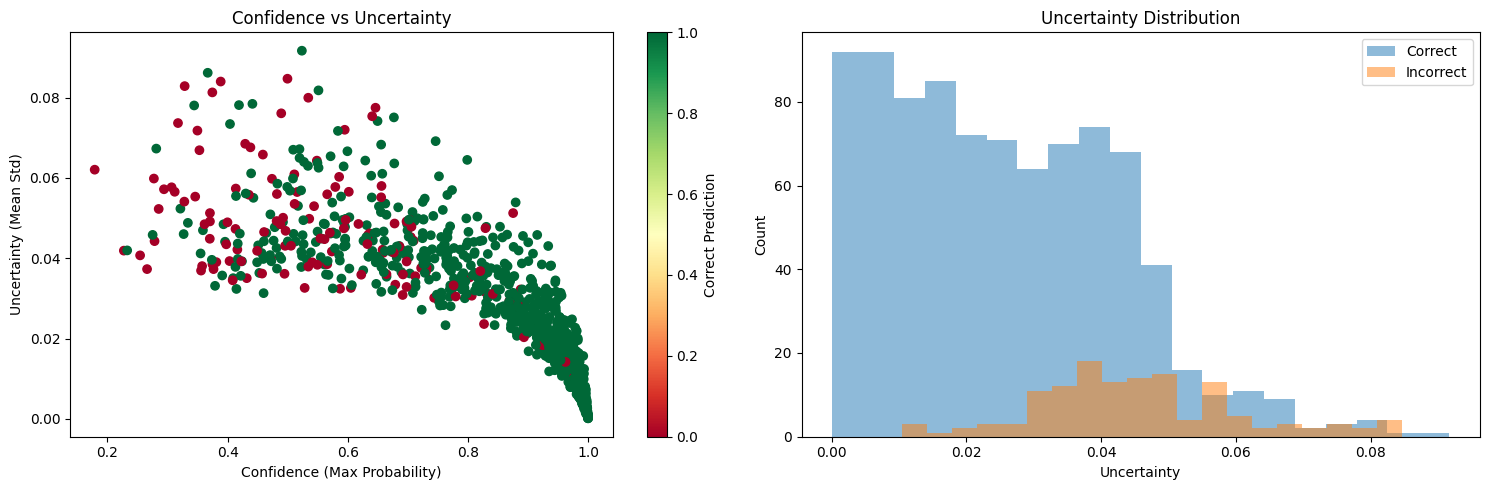

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
32/32 ━━━━━━━━━━━

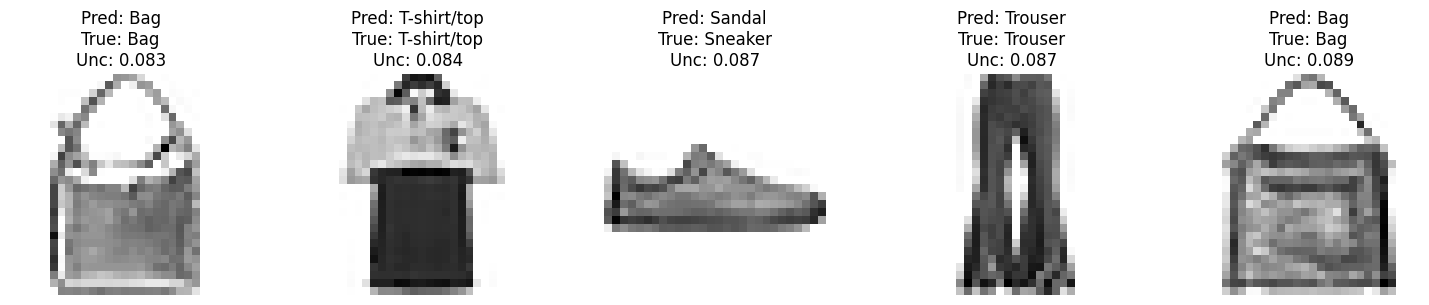

In [43]:

# Create and train model
model = create_mc_model()
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# Evaluate on test set
test_samples = X_test[:1000]  # Using a subset for visualization
test_labels = y_test[:1000]

# Plot uncertainty analysis
plot_uncertainty(model, test_samples, test_labels)

# Visualize most uncertain predictions
visualize_uncertain_predictions(model, test_samples, test_labels)



## Questions to Consider:

1. How does the uncertainty (standard deviation) correlate with prediction accuracy?
2. What types of images tend to have higher uncertainty in their predictions?
3. How might you use uncertainty estimates in a real-world application?
4. How does the number of MC samples affect the stability of uncertainty estimates?

# Exercise 5: Hyperparameter Tuning

In this exercise, you'll explore hyperparameter tuning using Keras Tuner. You'll implement different search strategies and visualize their results, while keeping the computational requirements reasonable.

## Part 1: Setup and Data Preparation



In [ ]:
import tensorflow as tf
import keras_tuner as kt
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Use a smaller subset for quicker training
train_size = 5000
test_size = 1000

# Create validation set
X_train = X_train_full[:train_size] / 255.0
X_valid = X_train_full[train_size:train_size+1000] / 255.0
X_test = X_test[:test_size] / 255.0

y_train = y_train_full[:train_size]
y_valid = y_train_full[train_size:train_size+1000]
y_test = y_test[:test_size]

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_valid)}")
print(f"Test set size: {len(X_test)}")



## Part 2: Define the Model Building Function



In [ ]:
def build_model(hp):
    """
    Build model with hyperparameters to tune.
    
    Parameters:
    hp: Keras Tuner hyperparameters object
    
    Returns:
    Compiled Keras model
    """
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
    
    # TODO: Add hp.Int for number of hidden layers (1-3)
    n_hidden = # Your code here
    
    # TODO: Add hp.Int for number of neurons (32-128 in steps of 32)
    n_neurons = # Your code here
    
    # TODO: Add hp.Choice for activation function ('relu', 'tanh')
    activation = # Your code here
    
    # Build hidden layers
    for _ in range(n_hidden):
        # TODO: Add Dense layer with tunable neurons and activation
        # Your code here
        
        # TODO: Add hp.Float for dropout rate (0-0.5)
        dropout_rate = # Your code here
        model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    # TODO: Add hp.Float for learning rate (log-scale between 0.0001 and 0.01)
    learning_rate = # Your code here
    
    # TODO: Add hp.Choice for optimizer ('sgd', 'adam')
    optimizer_choice = # Your code here
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) if optimizer_choice == 'sgd' \
        else tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=optimizer,
                 metrics=["accuracy"])
    return model



## Part 3: Implement Different Search Strategies



In [ ]:
def run_tuner(tuner_type='random', max_trials=10, overwrite=True):
    """
    Run hyperparameter search with specified tuner.
    
    Parameters:
    tuner_type: str, one of ['random', 'hyperband']
    max_trials: int, maximum number of trials to run
    overwrite: bool, whether to overwrite existing results
    
    Returns:
    tuner object
    """
    project_name = f"fashion_mnist_{tuner_type}"
    
    if tuner_type == 'random':
        tuner = kt.RandomSearch(
            build_model,
            objective="val_accuracy",
            max_trials=max_trials,
            directory="fashion_mnist_tuning",
            project_name=project_name,
            overwrite=overwrite
        )
    else:  # hyperband
        tuner = kt.Hyperband(
            build_model,
            objective="val_accuracy",
            max_epochs=10,
            factor=3,
            directory="fashion_mnist_tuning",
            project_name=project_name,
            overwrite=overwrite
        )
    
    # Print search space summary
    tuner.search_space_summary()
    
    # Create early stopping callback
    stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
    
    # Run the search
    tuner.search(X_train, y_train,
                epochs=10,
                validation_data=(X_valid, y_valid),
                callbacks=[stop_early])
    
    return tuner

def analyze_results(tuners):
    """Analyze and visualize results from different tuners."""
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Best validation accuracy progression
    plt.subplot(1, 2, 1)
    for name, tuner in tuners.items():
        trials = tuner.oracle.get_best_trials(num_trials=1)
        trial = trials[0]
        # Extract values from metric observations
        val_acc = [metric.value for metric in trial.metrics.get_history('val_accuracy')]
        plt.plot(val_acc, label=name)
    
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.title('Best Model Learning Curves')
    plt.legend()
    
    # Plot 2: Trial results distribution
    plt.subplot(1, 2, 2)
    for name, tuner in tuners.items():
        trials = tuner.oracle.trials
        final_accuracies = [t.metrics.get_last_value('val_accuracy') 
                           for t in trials.values() if t.metrics.get_last_value('val_accuracy')]
        plt.hist(final_accuracies, alpha=0.5, label=name, bins=10)
    
    plt.xlabel('Final Validation Accuracy')
    plt.ylabel('Count')
    plt.title('Distribution of Trial Results')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def print_best_models(tuners):
    """Print best hyperparameters and results for each tuner."""
    for name, tuner in tuners.items():
        print(f"\nBest hyperparameters for {name}:")
        best_hp = tuner.get_best_hyperparameters(1)[0]
        print(best_hp.values)
        
        best_model = tuner.get_best_models(1)[0]
        test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
        print(f"Test accuracy: {test_acc:.4f}")



## Part 4: Run the Experiments



In [ ]:

# Run both random search and hyperband tuning
tuners = {
    'Random': run_tuner('random', max_trials=5),
    'Hyperband': run_tuner('hyperband', max_trials=5)
}

# Analyze results
analyze_results(tuners)
print_best_models(tuners)



## Questions to Consider:

1. How do Random Search and Hyperband compare in terms of:
   - Final model performance?
   - Search efficiency?
   - Time to find good hyperparameters?

2. Which hyperparameters seem to have the most impact on model performance?

3. How might you modify the search space to improve results?

4. What are the trade-offs between search time and model performance?